## [지도학습/분류]Logistic Regression

### 0. 개념

**1) Logistic Regression**
- Regression 단어가 붙지만 분류용 모델

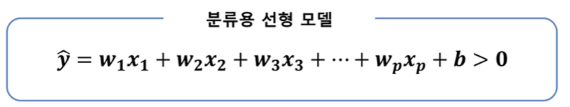


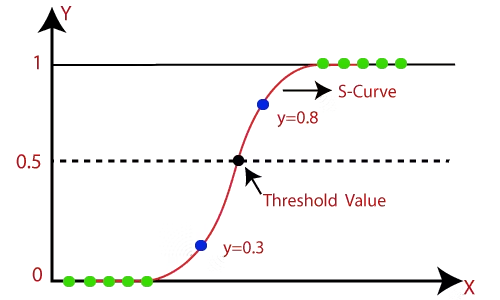



- 기준값(threshold value)을 기준으로 음성/양성 클래스 분류
- MSE는 사용하지 않는다
  - local minimum에 빠질 가능성이 높아서
- 교차엔트로피 오차(CEE: cross entropy error)
  - 주어진 데이터와 모델의 예측값 사이의 차이 계산
  - 0과 1사이의 값을 가지며, 값이 작을수록 모델의 예측이 정확하다
  - 하나의 변수(X)가 가질 수 있는 서로 다른 분포(p, q)를 가질 경우, 해당 분포들의 차이

  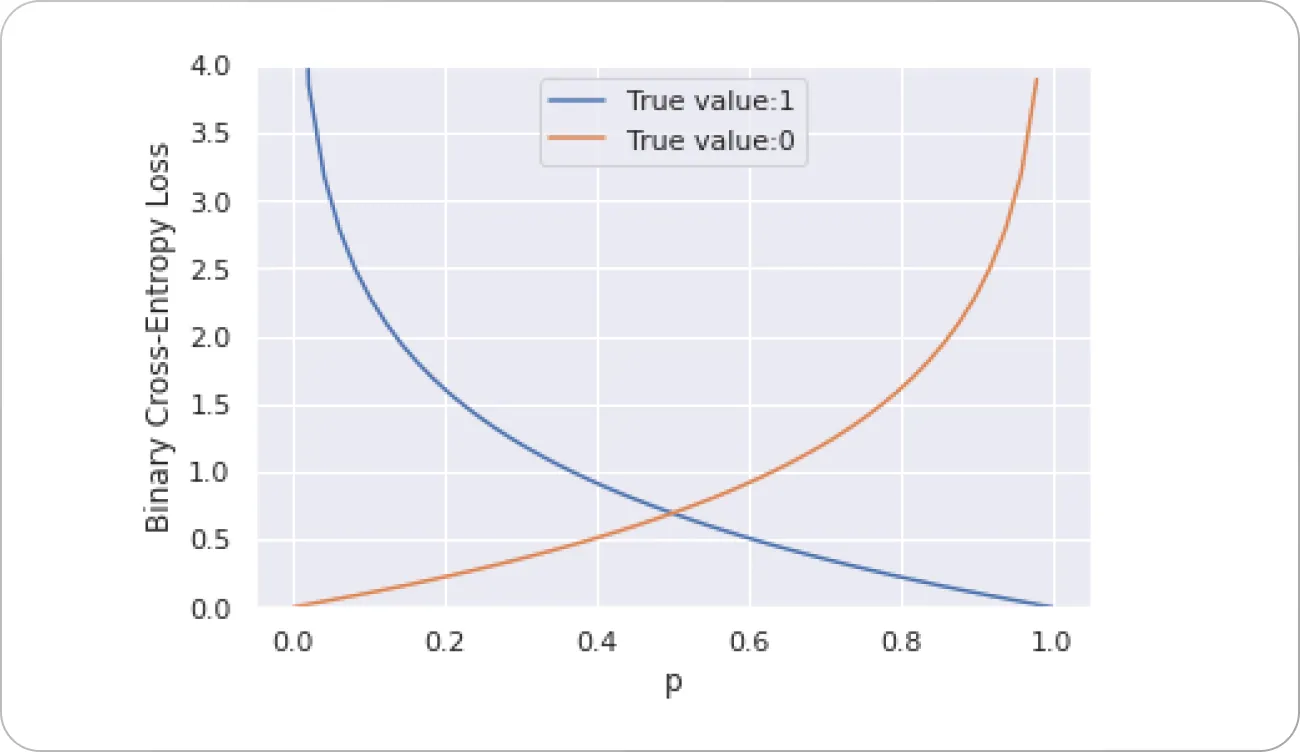
  

<br>

**2) Linear Support Vector Machine(SVM)**

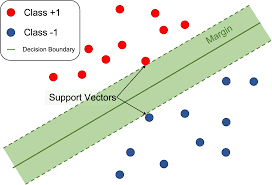

- 벡터 값이 가장 먼 직선을 그리는 것
- 직선에 가까이 몰려 있는 것들은 분류하기 어렵다.
- 결정경계를 어떻게 하면 잘 그을 수 있을까?
    - 결정경계와 가장 가까운 데이터를 support vector로 지정
    - 그 거리가 margin!! => margin이 최대로 멀수록 두 집단이 잘 분류되었다.
    - 두 집단 간의 유사도가 적다.




### 1. 문제 정의
- **BX** : 최근 이직시장이 활발하게 성장함에 따라 직원들도 퇴사행렬을 이루고 있음.. 경영진은 핵심인재 유출을 막기 위해 오랜 시간 함께 하고 싶은 회사를 만들고자 함.
- **CX** : 자신이 성장 가능한 회사, 성과에 따라 적절한 보상과 효율적인 업무를 진행할 수 있는 회사
- **DX** : (이직현황)데이터 분석을 통해 이직률과 연관있는 데이터는 지속적으로 확인, 개선. HR팀은 이직 가능성이 높은 핵심인재를 예측하고 해당 인원들을 위한 관리 프로그램을 운영

---

- **Trigger** : HR 데이터를 통한 최근 퇴사 및 이직현황 확인, 핵심 인재의 유출 여부 확인
- **Accelerator** : 직원의 인사관련 데이터를 통해 구성원의 불만족 요소나 잠재적인 문제(보상, 진급, 가치관 등) 확인
- **Tracker** : 핵심 인재의 이직률 변화 추이, 직원들의 업무 스트레스 지수

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 작업 디렉토리 변경
%cd "./drive/MyDrive/Colab Notebooks/머신러닝"

In [ ]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리도구
from sklearn.model_selection import train_test_split
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
data = pd.read_csv('data/job_transfer.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# 데이터 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

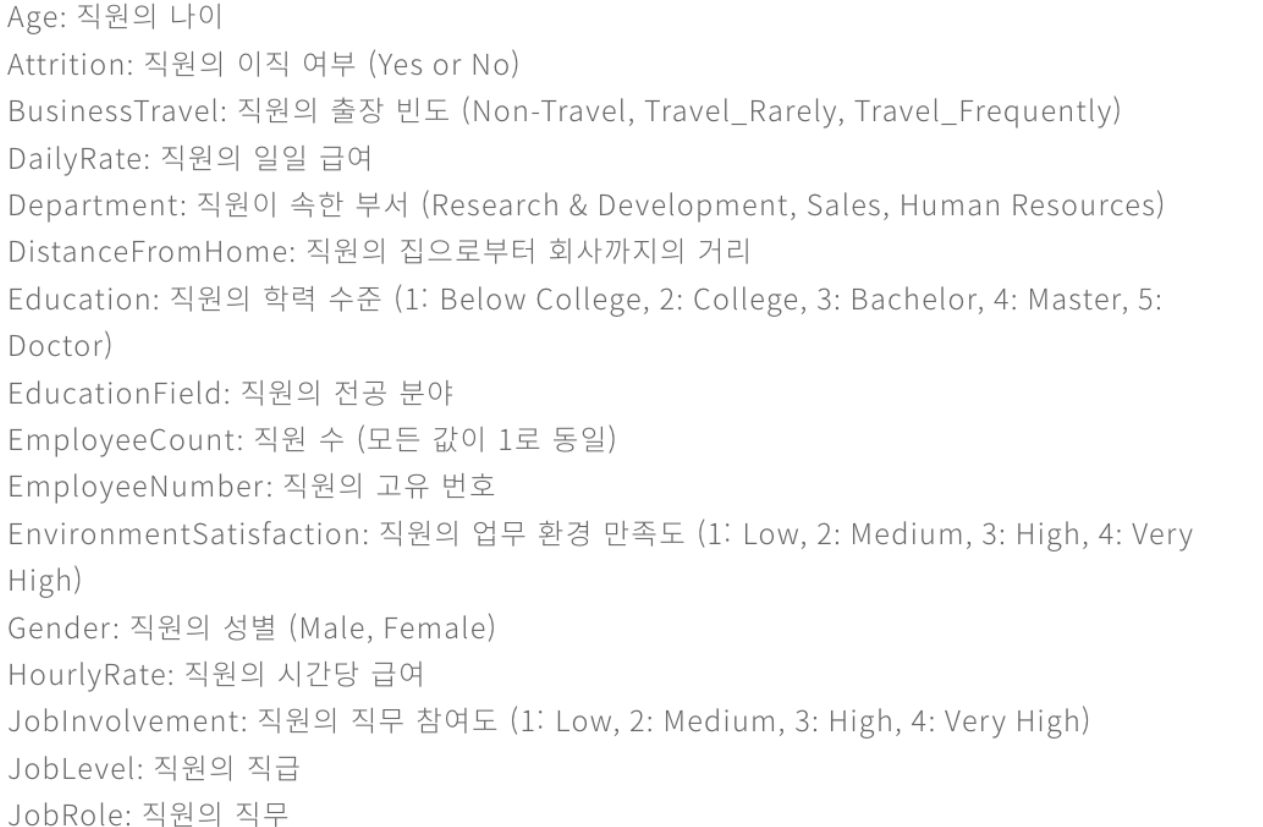

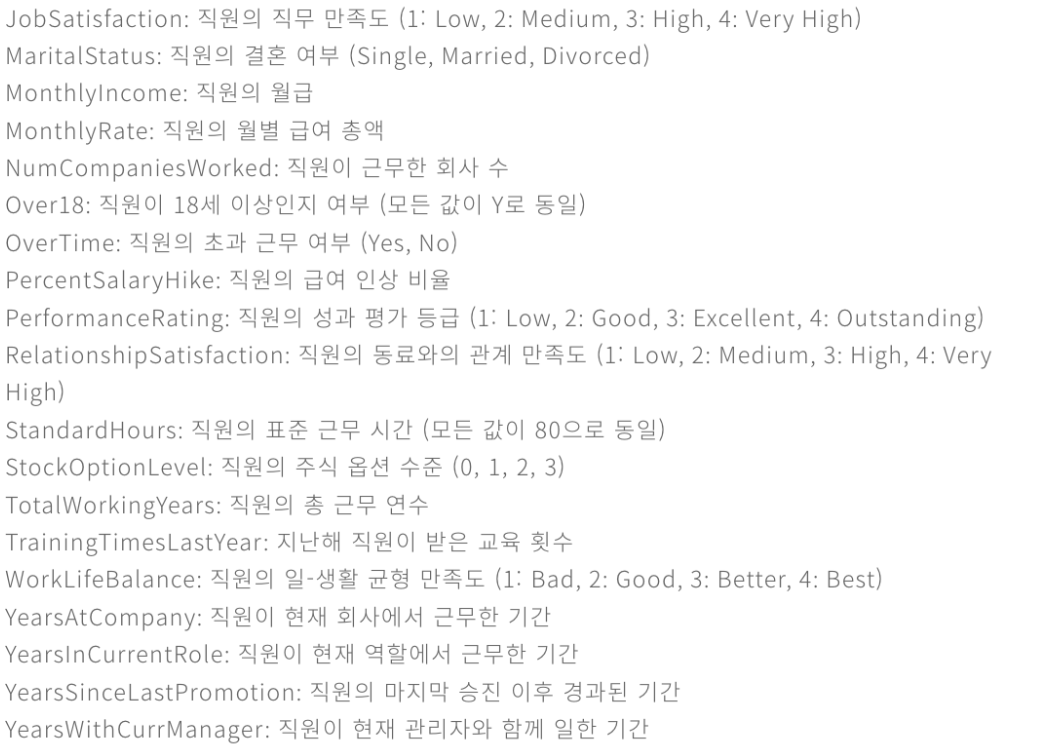

In [ ]:
# 기술통계량 확인
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2. 탐색적 데이터 분석(EDA)

In [ ]:
# 이직률 현황 확인
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [ ]:
# 이직률 계산
237/(1233+237)

# => 약 16% 이직

0.16122448979591836

In [ ]:
# 이직(정답데이터) -> 학습과 수치집계를 위해 수치데이터 변경
# Yest -> 1, NO -> 0
# np.where(조건, 조건이 참, 그외) -> 2개의 구간을 나눠주는 함수
data['Attrition'] = np.where(data['Attrition'] == 'Yes', 1, 0)
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
# Age 연령데이터 확인
data['Age']

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [ ]:
# 나이 데이터 카테고리화
# 30대 미만, 30-40대, 40대 이상
data['Age_cate'] = np.where(data['Age'] < 30, '30대 미만',
                    np.where(data['Age'] < 40, '30-40대', '40대 이상'))

In [ ]:
data[['Age', 'Age_cate']]

,Age,Age_cate
0,41,40대 이상
1,49,40대 이상
2,37,30-40대
3,33,30-40대
4,27,30대 미만
...,...,...
1465,36,30-40대
1466,39,30-40대
1467,27,30대 미만
1468,49,40대 이상


In [ ]:
# 나이대별 이직률 확인
age_gb = data.groupby('Age_cate')['Attrition'].agg(['count', 'sum'])
# count : 해당 카테고리에 있는 인원수, sum : 해당 카테고리내에 있는 이직자 수
age_gb

,count,sum
Age_cate,,
30-40대,622,89
30대 미만,326,91
40대 이상,522,57


In [ ]:
# 나이대별 이직률
age_gb['ratio'] = round(age_gb['sum'] / age_gb['count'] * 100, 1)  # 소숫점 첫번째 자리까지만 출력
age_gb

# => 30대 미만의 이직률이 높다

,count,sum,ratio
Age_cate,,,
30-40대,622,89,14.3
30대 미만,326,91,27.9
40대 이상,522,57,10.9


In [ ]:
# 성별에 따른 이직률(Gender)
gender_gb = data.groupby('Gender')['Attrition'].agg(['count', 'sum'])
gender_gb['ratio'] = round(gender_gb['sum'] / gender_gb['count'] * 100, 1)
gender_gb

# => 남성의 이직률이 높다

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [ ]:
# 부서별 이직률(Department)
department_gb = data.groupby('Department')['Attrition'].agg(['count', 'sum'])
department_gb['ratio'] = round(department_gb['sum'] / department_gb['count'] * 100, 1)
department_gb

# => Sales 부서가 이직률이 높다

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


##### 가설1) 업무 만족도는 높으나 인간관계로 인한 이직률이 높을 것이다!
- 가설이 옳지 않았음.
- 결과
    - 업무만족도가 높은 직원일수록 인간관계에 대해 이직영향을 덜 받는다
    - 업무만족도가 낮은 직원일수록 인간관계에 대해 이직영향을 많이 받는다
    - 전체적으로 인간관계보다는 업무만족도가 이직률에 더 영향을 미친다

In [ ]:
# 인간관계 만족도 : RelationshipSatisfaction
# 업무 만족도 : JobSatisfaction
data[['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition']].head()

,RelationshipSatisfaction,JobSatisfaction,Attrition
0,1,4,1
1,4,2,0
2,2,3,1
3,3,3,0
4,4,2,0


In [ ]:
# 업무 만족도 / 인간관계 상관관계를 통한 이직률 현황
gb = data.groupby(['JobSatisfaction', 'RelationshipSatisfaction'])['Attrition'].agg(['count', 'sum'])
gb['ratio'] = round(gb['sum'] / gb['count'] * 100, 1)
gb

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

##### 가설2) 근속년수 대비 같은 업무를 한 비중이 높다면 이직률이 높을 것이다!
- 결과 : 근속년수 대비 같은 일을 짧게 할수록 이직률이 높다

In [ ]:
# YearsInCurrentRole : 직원이 현재 역할에서 근무한 기간
# YearsAtCompany : 직원이 현재까지 근무한 기간
data[['YearsInCurrentRole', 'YearsAtCompany', 'Attrition']].head()

,YearsInCurrentRole,YearsAtCompany,Attrition
0,4,6,1
1,7,10,0
2,0,0,1
3,7,8,0
4,2,2,0


In [ ]:
# 근속년수 대비 한가지 업무를 한 비율
data['Role_Company'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['Role_Company'].fillna(0, inplace=True)
data['Role_Company']  # 분포확인(distplot)

# fillna(값): 결측치를 내가 원하는 값으로 채울 때 사용하는 함수, inplace 속성 확인

0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: Role_Company, Length: 1470, dtype: float64

<Axes: xlabel='Role_Company', ylabel='Density'>

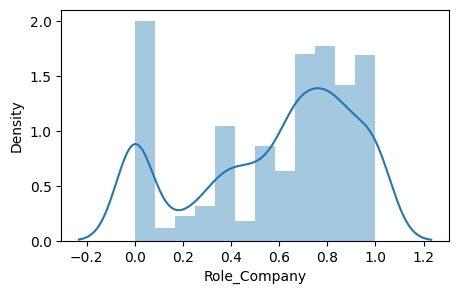

In [ ]:
# data['Role_Company']  분포확인(distplot)
plt.figure(figsize=(5, 3))
sns.distplot(data['Role_Company'])

0 ~ 0.3 / 0.3 ~ 0.7 / 0.7 ~ 1  구간화 진행

In [ ]:
# Role_Company가 0인 데이터의 수치 확인
len(data[data['Role_Company'] == 0])

# 244명에 대한 데이터는 제외하고 구간

244

In [ ]:
# 구간화 작업 진행
data['Role_Company_gb'] = np.where((0 < data['Role_Company']) & (data['Role_Company'] < 0.4), '0.4 미만',
                    np.where(data['Role_Company'] < 0.7, '0.4-0.7 미만', '0.7 이상'))

data[['Role_Company', 'Role_Company_gb']]

,Role_Company,Role_Company_gb
0,0.666667,0.4-0.7 미만
1,0.700000,0.7 이상
2,0.000000,0.4-0.7 미만
3,0.875000,0.7 이상
4,1.000000,0.7 이상
...,...,...
1465,0.400000,0.4-0.7 미만
1466,1.000000,0.7 이상
1467,0.333333,0.4 미만
1468,0.666667,0.4-0.7 미만


In [ ]:
# 근속년수 대비 같은 일을 한 데이터의 이직률 확인
gb = data.groupby('Role_Company_gb')['Attrition'].agg(['count', 'sum'])
gb['ratio'] = round(gb['sum'] / gb['count'] * 100, 1)
gb

,count,sum,ratio
Role_Company_gb,,,
0.4 미만,144,20,13.9
0.4-0.7 미만,667,132,19.8
0.7 이상,659,85,12.9


##### 가설3) 야근을 많이 해도 급여 인상률이 높으면 이직률이 낮을 것이다
- 결과 : 야근을 많이 하는 직원은 연봉인상률이 높음에도 불구하고 이직률이 높다
- 야근을 줄여주는 조치를 취해야겠구나!

In [ ]:
# 야근여부에 따른 이직률 현황
gb = data.groupby('OverTime')['Attrition'].agg(['count', 'sum'])
gb['ratio'] = round(gb['sum'] / gb['count'] * 100, 1)
gb

# => 야근을 하는 사람이 이직률이 높다

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [ ]:
# 연봉인상률 추가(PercentSalaryHike)
gb = data.groupby(['OverTime', 'PercentSalaryHike'])['Attrition'].agg(['count', 'sum'])
gb['ratio'] = round(gb['sum'] / gb['count'] * 100, 1)
gb

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [ ]:
# 야근하는 직원들의 연봉인상률에 따른 이직률 시각화
reset_gb = gb.reset_index()

# 야근을 하는 직원들만 추출
yes_gb = reset_gb[reset_gb['OverTime'] == 'Yes']
yes_gb

,OverTime,PercentSalaryHike,count,sum,ratio
15,Yes,11,61,22,36.1
16,Yes,12,59,15,25.4
17,Yes,13,65,20,30.8
18,Yes,14,56,16,28.6
19,Yes,15,21,6,28.6
20,Yes,16,23,6,26.1
21,Yes,17,16,5,31.2
22,Yes,18,29,8,27.6
23,Yes,19,21,6,28.6
24,Yes,20,15,3,20.0


<BarContainer object of 15 artists>

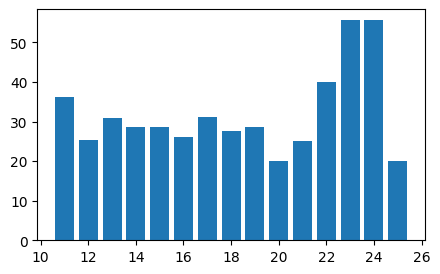

In [ ]:
# 연봉인상률(x축) 대비 이직률(y축) 차트 그리기
plt.figure(figsize = (5,3))
plt.bar(yes_gb['PercentSalaryHike'], yes_gb['ratio'])

# => 야근을 많이 하는 직원은 연봉인상률이 높음에도 불구하고 이직률이 높다

### 3. 모델링
- 데이터 분리
- 모델 학습
- 모델 평가

In [ ]:
# 문제(X), 정답(y) 데이터로 분리
# data.info()

# 필요한 column만 추출 -> 불필요한 컬럼 삭제
X = data.drop(['Age_cate', 'Role_Company', 'Role_Company_gb', 'Attrition'], axis = 1)
y = data['Attrition']

### 4. 인코딩
- 범주형 데이터를 수치형으로 변환
    - 원핫인코딩(onehot encoding) : 값의 크고 작음의 의미가 없을 때
    - 레이블인코딩(label encoding) : 값의 크고 작음에 의미가 있어 가중치를 주고 싶을 때 -> 의미가 있을수록 큰 숫자 매칭

In [ ]:
# 출장을 많이 갈수록 이직률이 높을 것이다!
X['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
# 딕셔너리로 우선순위를 정의(가중치를 주고 싶은 데이터에 큰 숫자)
BT_dict = {'Non-Travel': 1,
          'Travel_Rarely': 2,
          'Travel_Frequently': 3}
X['BusinessTravel'] = X['BusinessTravel'].map(BT_dict)

# map(): 키값으로 검색하여 value로 변경해주는 함수

In [ ]:
# 원핫인코딩
X_one_hot = pd.get_dummies(X, dtype = 'int64')

In [ ]:
X_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   BusinessTravel                     1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [ ]:
# train, test 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1029, 53)
(1029,)
(441, 53)
(441,)


### 5. 교차검증
- 모델의 일반화 성능을 파악
- 방법 : (학습용 데이터 내에서) train set과 test set으로 여러겹 나누어 평가
- 교차점증 결과가 평균적으로 비슷한 결과가 출력된다면 일반화된 모델이라고 평가
- 한정적인 데이터 내에서 여러겹으로 나눠 여러 번 평가하면 신뢰도가 올라감.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  # 분류모델!
logi_model = LogisticRegression(max_iter=1000)
logi_model.fit(X_train, y_train)
logi_model.score(X_test, y_test)  # 정확도 accuracy

# 정확도 : 전체 데이터에서 정답을 맞춘 데이터의 비율

0.8571428571428571

In [ ]:
from sklearn.model_selection import cross_val_score # 교차검증도구
# cross_val_score(모델명, 학습용 문제, 학습용 정답, cv=교차검증의 횟수)
result = cross_val_score(logi_model, X_train, y_train, cv=5)
print(result)
print(result.mean())

[0.85436893 0.83009709 0.86893204 0.84466019 0.83902439]
0.8474165285342175


#### SVM 모델

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.8253968253968254

In [ ]:
# 교차검증
result = cross_val_score(svm_model, X_train, y_train, cv=5)
print(result)
print(result.mean())

[0.84466019 0.84466019 0.84466019 0.84466019 0.84390244]
0.8445086431446839


### 평가지표 확인
**Confusion Matrix**

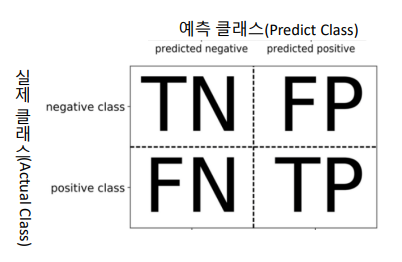


- **정확도(Accuracy)** : 전체 중에 정확히 맞춘(TN+TP)비율
    - 불균형한 데이터가 들어있을 경우 정확도로 성능을 평가하는 것은 문제가 된다
- **재현율(Recall)** : 실제 양성 중 예측 양성 비율(TP, FN)
- **정밀도(Precision)** : 예측 양성 중에 실제 양성 비율(TP, FP)

- **F1-score** : 정밀도와 재현율의 조화평균
    - 1에 가까울수록 평균적으로 높은 성능을 낸다

In [ ]:
from sklearn.metrics import classification_report
# classification_report(실제정답, 예측정답)

# 예측
pre = logi_model.predict(X_test)

print(classification_report(y_test, pre))

# f1-score -> 0.44 이직을 잘 예측하지 못한다

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       364
           1       0.79      0.25      0.38        77

    accuracy                           0.86       441
   macro avg       0.83      0.62      0.65       441
weighted avg       0.85      0.86      0.82       441



#### 이직에 영향을 미치는 입력특성 확인

- 결과 : OverTime(야근)이 높을 수록 이직률이 높다

In [ ]:
# 가중치
coef = logi_model.coef_[0]
pd.Series(coef, index = X_train.columns).sort_values(ascending = False)

OverTime_Yes                         0.291473
YearsSinceLastPromotion              0.224408
BusinessTravel                       0.192985
MaritalStatus_Single                 0.168449
Department_Sales                     0.116992
NumCompaniesWorked                   0.093975
EducationField_Marketing             0.084074
YearsAtCompany                       0.082280
JobRole_Sales Representative         0.071968
DistanceFromHome                     0.051617
EducationField_Technical Degree      0.049610
JobRole_Laboratory Technician        0.048785
Education                            0.047768
Gender_Male                          0.040378
JobRole_Sales Executive              0.038999
PercentSalaryHike                    0.032770
StandardHours                        0.021731
EducationField_Human Resources       0.021266
JobRole_Human Resources              0.012928
PerformanceRating                    0.009994
Department_Human Resources           0.009647
JobRole_Manager                   